# Setup
download uv: https://docs.astral.sh/uv/getting-started/installation/

select open-la-applets kernel in the top right corner

In [7]:
import numpy as np
import json
import matplotlib.pyplot as plt
    
def Van_der_Pol_like_equation(labda,mu,gamma,x0,y0,tend):
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    def f(x,labda,gamma):
        if np.abs(x-labda)<=1:
            return 1+labda**2-2*labda*x+x**2
        else:
            return gamma*(1-np.sqrt(np.abs(x-labda)))

    def ode(t,y,labda,gamma,mu):
        x = y[0]
        y = y[1]
        rhsx = y
        rhsy = -x+labda+mu*f(x,labda,gamma)*y
        rhs = np.array([rhsx,rhsy])
        return rhs
  

    def solve_my_ivp(x0,y0,tend,labda,gamma,mu):
        t0 = 0
        trange = [t0,tend]
        y0 = [x0,y0]
        N = int(np.min([tend*1e3,1e4]))
        tout = np.linspace(t0,tend,N+1)
        dt = np.mean(np.diff(tout))
        yout = np.zeros((2,N+1))
        yout[:,0] = y0
        for n in np.arange(0,N):
            k1 = dt*ode(tout[n],yout[:,n],labda,gamma,mu)
            k2 = dt*ode(tout[n]+dt/2,yout[:,n]+1/2*k1,labda,gamma,mu)
            k3 = dt*ode(tout[n]+dt/2,yout[:,n]+1/2*k2,labda,gamma,mu)
            k4 = dt*ode(tout[n]+dt,yout[:,n]+k3,labda,gamma,mu)
            yout[:,n+1] = yout[:,n]+1/6*(k1+2*k2+2*k3+k4)
        return tout, yout[0,:], yout[1,:]

    plt.close('all')
    fig = plt.figure()
    t,x,y = solve_my_ivp(x0,y0,tend,labda,gamma,mu)
    plt.plot(x,y,color=colors[0])
    plt.plot(x0,y0,ls='',marker='o',color=colors[0],label='$x(0)='+str(x0)+', y(0)='+str(y0)+'$')
    plt.plot(labda,0,ls='',marker='o',color=colors[1],label='$x_{eq}='+str(labda)+', y_{eq}='+str(0)+'$')
    plt.xlabel('$x(t)$')
    plt.ylabel('$y(t)$')
    plt.grid()
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15))
    
    # Create a grid for the vector field
    x_vals = np.linspace(labda - 3, labda + 3, 20)
    y_vals = np.linspace(-6, 6, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    vector_field = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            vec = ode(0, [X[i, j], Y[i, j]], labda, gamma, mu)
            U[i, j] = vec[0]
            V[i, j] = vec[1]
            vector_field.append({
                "x": float(X[i, j]),
                "y": float(Y[i, j]),
                "u": float(U[i, j]),
                "v": float(V[i, j])
            })
    
    plt.quiver(X, Y, U, V, color='lightgray', alpha=0.75)
    plt.xlim(labda - 3, labda + 3)
    plt.ylim(-6, 6)
    plt.title('Van der Pol-like equation phase space')
    plt.show()
    
    # Save vector field to JSON array
    with open("vector_field.json", "w") as f:
        json.dump(vector_field, f)


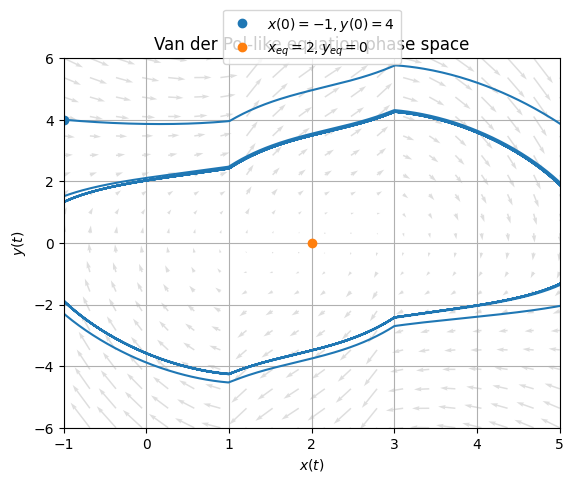

In [8]:
labda = 2
mu = 0.67
gamma = 2
x_0 = -1
y_0 = 4
t_end = 50

Van_der_Pol_like_equation(labda,mu,gamma,x_0,y_0,t_end)